In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from halomod import TracerHaloModel
import halomod
import hmf
from IPython.display import Image


In the field of cosmology and astrophysics, the halo mass function is a tool used to describe the number density of halos (large structures of dark matter) of different masses in the universe. It's an important ingredient in understanding the structure of the universe and the formation and evolution of galaxies, which are thought to form within these dark matter halos.

The halo mass function, N(M), gives the number of halos in a specific mass range. This is usually represented per unit volume and per unit logarithmic mass interval, thus N(M)dM is the number density of halos with masses in the interval [M, M+dM]. It is derived from the initial density fluctuations in the universe that are predicted by the Big Bang theory and the physics of the early universe.

One of the most commonly used formulations for the halo mass function is the Press-Schechter function, although this has been refined by later work such as Sheth-Tormen and Jenkins et al.

In [2]:
print("halomod version: ", halomod.__version__)
print("hmf version:", hmf.__version__)

halomod version:  2.1.0
hmf version: 3.4.4


In [3]:
hm = TracerHaloModel(
    cosmo_params={
        "H0": 70,     # Hubble constant at z=0
        "Om0": 0.3,   # Matter density parameter at z=0
        "Ob0": 0.045, # Baryon density parameter at z=0
    },
    z=0,  # redshift
    hmf_model='SMT',  # Sheth-Tormen mass function, for example
)


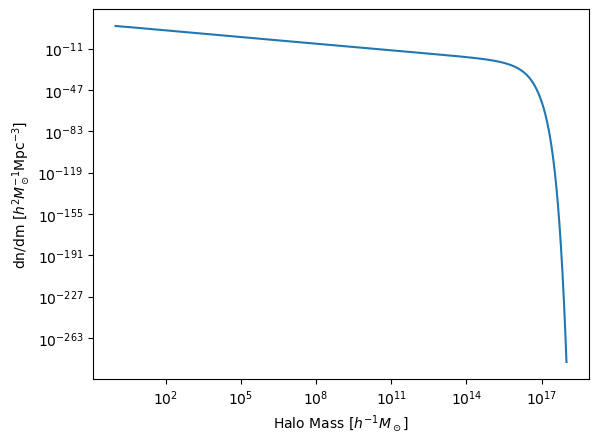

In [4]:
plt.plot(hm.m, hm.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo Mass [$h^{-1} M_\odot$]")
plt.ylabel(r"dn/dm [$h^2 M_\odot^{-1} {\rm Mpc}^{-3}$]");

In the context of the ΛCDM (Lambda-Cold Dark Matter) cosmological model, the halo mass function is indeed expected to decrease at higher halo masses. There are a few reasons for this:

1. **Less Volume for Larger Structures**: Larger halos (those of higher mass) naturally require more volume to form. As you go to larger and larger scales, there's simply less volume available in the universe, so you expect fewer of these larger structures.

2. **Hierarchical Structure Formation**: The process of structure formation in the ΛCDM cosmological model is hierarchical, which means that small structures form first, and then merge together to form larger structures. This process takes time, so at any given moment (or at any given redshift), there will be fewer large structures than small structures simply because there hasn't been enough time for all the small structures to merge into large structures.

3. **Rare Density Fluctuations**: The initial density fluctuations in the early universe, which ultimately grew into galaxies and clusters of galaxies, followed a Gaussian distribution. High-mass halos correspond to rare, high-amplitude fluctuations in this distribution. Because these high-amplitude fluctuations are rare, high-mass halos are also rare.

So, seeing the halo mass function decrease is a natural outcome of the ΛCDM cosmological model and the process of hierarchical structure formation. It's an observational fact that there are fewer large galaxy clusters than there are individual galaxies or small groups of galaxies.

Question: sudden decrease at around 10^17 solar masses?

In [18]:
def plot_halo_mass_function(z, cosmo_params, hmf_model, color='red', linestyle='-', label=None):
    """
    Generate and plot the halo mass function for a given redshift and HMF model.

    Parameters
    ----------
    z : float
        Redshift value.
    cosmo_params : dict
        Dictionary of cosmological parameters.
    hmf_model : str
        HMF model.
    color : str
        Color of the plot line.
    linestyle : str
        Line style of the plot line.    
    label : str
        Label for the plot line.
    """
    hm = TracerHaloModel(cosmo_params=cosmo_params, z=z, hmf_model=hmf_model)
    plt.loglog(hm.m, hm.dndm, color=color, linestyle=linestyle, label=label)
    plt.xlabel("Halo Mass [$h^{-1} M_\odot$]")
    plt.ylabel(r"dn/dm [$h^2 M_\odot^{-1} {\rm Mpc}^{-3}$]")


Absolutely, in the context of halomod and the halo mass function, here are a few important parameters that you should consider:

1. **Cosmological Parameters**: These include parameters such as the matter density (Omega_m), the dark energy density (Omega_Lambda), the Hubble constant (H0), the spectral index (ns), and the amplitude of the primordial power spectrum (sigma_8 or As). Changes in these parameters will affect the overall shape and normalization of the halo mass function.

2. **Redshift (z)**: The redshift is a measure of how much the universe has expanded since the light we observe was emitted. The halo mass function evolves over time, so changing the redshift parameter will give you a sense of how the distribution of halos changes as the universe evolves.

3. **Halo Definition**: Halos can be defined in different ways, typically involving a threshold density contrast. Common choices include the virial definition and definitions based on a fixed overdensity relative to the mean or critical density of the universe. The choice of halo definition can affect the halo mass function.

4. **Mass Function Model**: As mentioned earlier, there are several different models for the halo mass function, including the Press-Schechter function, the Sheth-Tormen function, and the Jenkins function, among others. Different models can give slightly different predictions for the halo mass function, so it's worth comparing them.

5. **Halo Bias Model**: The halo bias describes how the distribution of halos is related to the underlying distribution of dark matter. Different models for the halo bias will give different predictions for the clustering of halos and, combined with the halo mass function, the clustering of galaxies.

In addition to exploring these parameters, you may also want to try fitting your model to observational data, such as galaxy surveys or cosmic microwave background data, to see how well it can reproduce the observed distribution of matter in the universe.

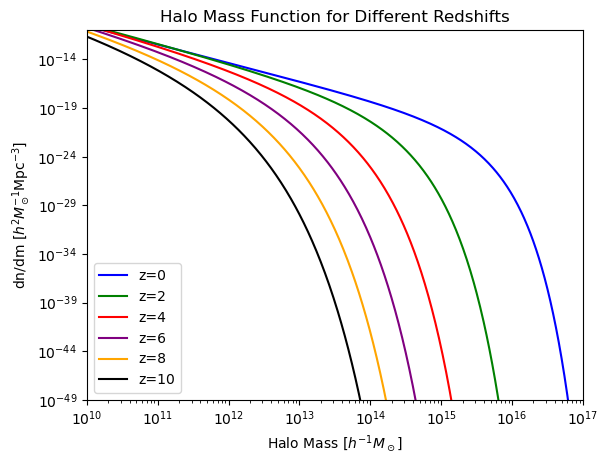

In [57]:
cosmo_params = {
    "H0": 67.4,     # Hubble constant at z=0
    "Om0": 0.315,   # Matter density parameter at z=0
    "Ob0": 0.02237  # Baryon density parameter at z=0
}

# Define the redshifts and corresponding plot colors
z_values = [0, 2, 4, 6, 8, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'black']

# Call the function for each redshift
for z, color in zip(z_values, colors):
    plot_halo_mass_function(z, cosmo_params, 'SMT', color=color, label=f'z={z}')

# Set the x-axis and y-axis limits
plt.xlim(1e10, 1e17)
plt.ylim(10e-50, 10e-12)

# Add a title
plt.title("Halo Mass Function for Different Redshifts")

# Add a legend
plt.legend()

# Display the plot
plt.show()


The halo mass function (HMF) describes the number density of halos as a function of their mass. The HMF depends strongly on the redshift, which is a measure of the age of the universe. 

As redshift increases (which corresponds to looking back in time), the universe was smaller, denser, and clumpier. Dark matter halos are the result of gravitational instabilities and collapse in the dark matter fluid, and since these processes take time, there are simply less large halos at higher redshifts. 

As a result, the HMF at high redshifts is generally suppressed for large masses compared to the HMF at low redshifts. More specifically, the HMF tends to peak at a certain mass, and this peak shifts to lower masses as redshift increases. 

So, at high redshifts, you tend to find more smaller halos and less larger ones, while at lower redshifts (closer to the current age of the universe), larger halos have had time to form through the merger of smaller ones, and thus you see more large halos and fewer small ones.

Another important point is that at any given redshift, the number density of halos decreases rapidly with increasing halo mass. This is due to the hierarchical nature of structure formation in the universe - small structures form first, and then merge over time to form larger ones. Hence, small halos are always more common than large ones, at any given redshift.

Remember that the specific changes in the HMF with redshift also depend on the cosmological parameters assumed, the definition of a halo (virialized, SO, FOF, etc.), and the specific model used to calculate the HMF.

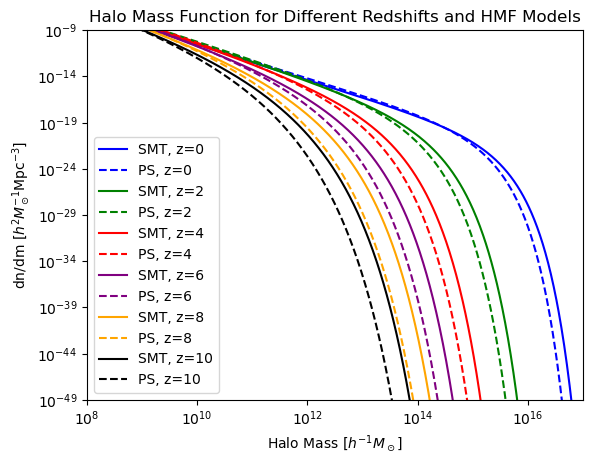

In [56]:
# Define the redshifts and corresponding plot colors
z_values = [0, 2, 4, 6, 8, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'black']

# Cosmological parameters
cosmo_params = {
    "H0": 67.35,     # Hubble constant at z=0
    "Om0": 0.315,   # Matter density parameter at z=0
    "Ob0": 0.02237  # Baryon density parameter at z=0
}

# Halo mass function models
hmf_models = ['SMT', 'PS']

# Call the function for each redshift and HMF model
for z, color in zip(z_values, colors):
    for hmf_model in hmf_models:
        linestyle = '-' if hmf_model == 'SMT' else '--'
        plot_halo_mass_function(z, cosmo_params, hmf_model, color=color, linestyle=linestyle, label=f'{hmf_model}, z={z}')

# Set the x-axis and y-axis limits
plt.xlim(1e8, 1e17)
plt.ylim(10e-50, 10e-10)

# Add a title
plt.title("Halo Mass Function for Different Redshifts and HMF Models")

# Add a legend
plt.legend()

# Display the plot
plt.show()

Friday's work: 
1. make the gif: http://background.uchicago.edu/~whu/transfer/poweran4.html
2. literature research: trend of the plots
3. units conversion

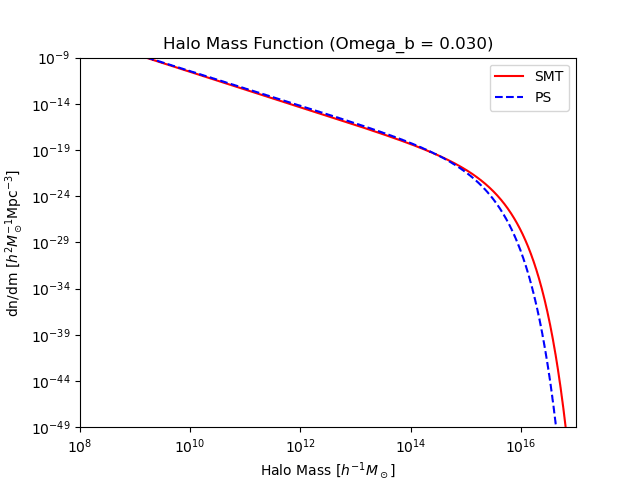

In [55]:
# Define the cosmological parameters
cosmo_params = {
    "H0": 67.4,     # Hubble constant at z=0
    "Om0": 0.315    # Matter density parameter at z=0
}

# Define the halo mass function model
hmf_model = 'SMT'

# Create a series of plots for different values of Ob0
filenames = []
for i, Ob0 in enumerate(np.arange(0.030, 0.050, 0.001)):
    cosmo_params["Ob0"] = Ob0
    plt.figure()
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='SMT', color='red', linestyle='-')
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='PS', color='blue', linestyle='--')
    plt.title(f"Halo Mass Function (Omega_b = {Ob0:.3f})")
    plt.xlim(1e8, 1e17)
    plt.ylim(10e-50, 10e-10)
    plt.legend(['SMT', 'PS'])
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('halo_mass_function_omega_b.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Explicitly close the writer
writer.close()

# Remove the individual PNG files
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename="halo_mass_function_omega_b.gif")


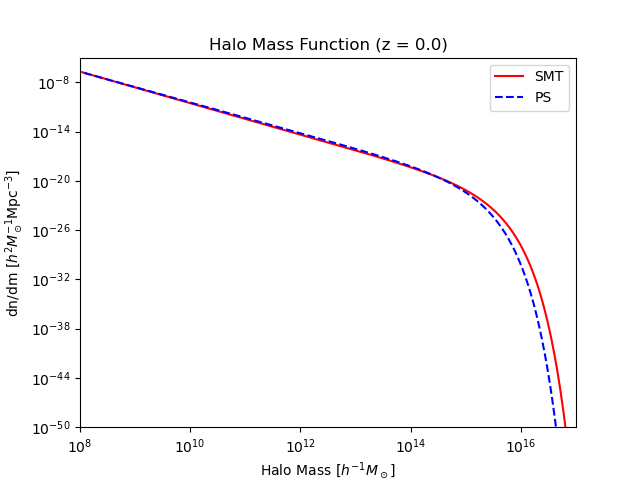

In [54]:
# Define the cosmological parameters
cosmo_params = {
    "H0": 67.4,     # Hubble constant at z=0
    "Om0": 0.315,   # Matter density parameter at z=0
    "Ob0": 0.02237  # Baryon density parameter at z=0
}

# Define the halo mass function model
hmf_model = 'SMT'

# Create a series of plots for different redshift values
filenames = []
for i, z in enumerate(np.arange(0, 11, 1)):  # replace with your range of z values
    plt.figure()
    plot_halo_mass_function(z=z, cosmo_params=cosmo_params, hmf_model='SMT', color='red', linestyle='-')
    plot_halo_mass_function(z=z, cosmo_params=cosmo_params, hmf_model='PS', color='blue', linestyle='--')
    plt.title(f"Halo Mass Function (z = {z:.1f})")
    plt.xlim(1e8, 1e17)  # adjust the range as needed
    plt.ylim(1e-50, 1e-5)  # adjust the range as needed
    plt.legend(['SMT', 'PS'])
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('halo_mass_function_redshift.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Explicitly close the writer
writer.close()

# Remove the individual PNG files
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename="halo_mass_function_redshift.gif")

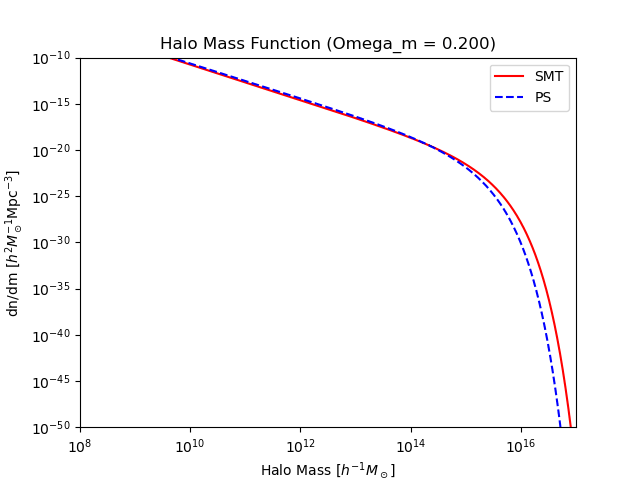

In [52]:
# Define the cosmological parameters
cosmo_params = {
    "H0": 67.36,     # Hubble constant at z=0
    "Ob0": 0.02237, # Baryon density parameter, set to a constant value
}

# Define the halo mass function model
hmf_model = 'SMT'

# Create a series of plots for different values of Om0
filenames = []
for i, Om0 in enumerate(np.arange(0.2, 0.4, 0.01)):  # replace with your range of Om0 values
    cosmo_params["Om0"] = Om0
    plt.figure()
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='SMT', color='red', linestyle='-')
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='PS', color='blue', linestyle='--')
    plt.title(f"Halo Mass Function (Omega_m = {Om0:.3f})")
    plt.xlim(1e8, 1e17)  # adjust the range as needed
    plt.ylim(1e-50, 1e-10)  # adjust the range as needed
    plt.legend(['SMT', 'PS'])
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('halo_mass_function_omega_m.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Explicitly close the writer
writer.close()

# Remove the individual PNG files
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename="halo_mass_function_omega_m.gif")

In [58]:
from hmf.alternatives.wdm import TransferWDM # Transfer-function class with WDM modifications
from hmf import MassFunction    # Full mass-function class in CDM
from hmf.alternatives.wdm import MassFunctionWDM #Mass Function class in WDM (note all WDM variants just have appended WDM)

In [59]:
wdm_transfer = TransferWDM() #Default Planck15 cosmology and m_x = 3keV

In [60]:
wdm_transfer.update(wdm_mass=1)

In [61]:
print("lamda_eff_fs: ", wdm_transfer.wdm.lam_eff_fs)
print("log10 m_fs: ", np.log10(wdm_transfer.wdm.m_fs))
print("lambda_hm/lambda_eff_fs: ", wdm_transfer.wdm.lam_hm/wdm_transfer.wdm.lam_eff_fs)
print("M_hm/M_fs: ", wdm_transfer.wdm.m_hm/wdm_transfer.wdm.m_fs)

lamda_eff_fs:  0.047258369153852016
log10 m_fs:  6.673600239923831
lambda_hm/lambda_eff_fs:  13.933543286134519
M_hm/M_fs:  2705.1086515237116


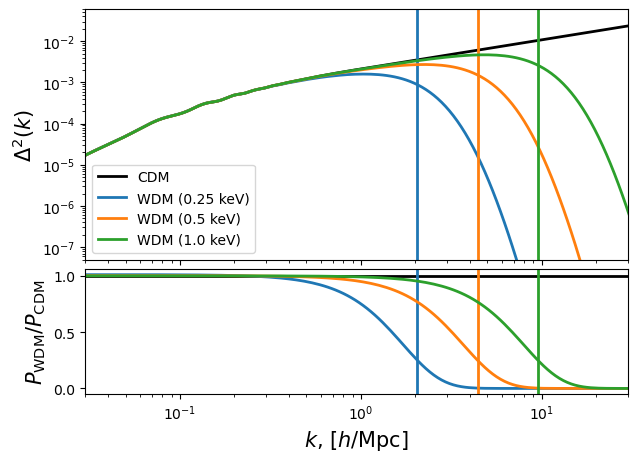

In [63]:
cdm_mf = MassFunction(z=49)
wdm_transfer.update(z=49)

fig,ax = plt.subplots(2,1,sharex=True,subplot_kw=dict(xscale='log',xlim=(0.03,30)),figsize=(7,5),
                  gridspec_kw={"height_ratios":(2,1),"hspace":0.05})

ax[0].plot(cdm_mf.k,cdm_mf.delta_k,label="CDM",lw=2,color="k")
ax[1].plot(cdm_mf.k,np.ones_like(cdm_mf.k),lw=2,color="k")

for i,mx in enumerate([0.25, 0.5, 1.0]):
    wdm_transfer.update(wdm_mass = mx)
    ax[0].plot(wdm_transfer.k,wdm_transfer.delta_k,label="WDM (%s keV)"%mx,lw=2,color=f"C{i}")
    ax[1].plot(wdm_transfer.k,wdm_transfer.delta_k/cdm_mf.delta_k,lw=2,color=f"C{i}")
    ax[0].axvline(2*np.pi/wdm_transfer.wdm.lam_hm,color=f"C{i}",lw=2)
    ax[1].axvline(2*np.pi/wdm_transfer.wdm.lam_hm,color=f"C{i}",lw=2)

ax[1].set_xlabel(r"$k$, [$h$/Mpc]",fontsize=15)
ax[0].set_ylim((5e-8,0.06))

ax[0].set_yscale('log')
ax[1].set_ylabel(r"$P_{\rm WDM}/P_{\rm CDM}$",fontsize=15)
ax[0].set_ylabel(r"$\Delta^2(k)$",fontsize=15)
ax[0].legend(loc=0)

In [67]:
def plot_power_spectrum(z, cosmo_params, color='blue', linestyle='-', label=None):
    """
    Generate and plot the power spectrum for a given redshift.

    Parameters
    ----------
    z : float
        Redshift value.
    cosmo_params : dict
        Dictionary of cosmological parameters.
    color : str
        Color of the plot line.
    linestyle : str
        Line style of the plot line.    
    label : str
        Label for the plot line.
    """
    hm = TracerHaloModel(cosmo_params=cosmo_params, z=z)
    plt.loglog(hm.k_hm, hm.power_auto_tracer, color=color, linestyle=linestyle, label=label)
    plt.xlabel("k [$h$ Mpc$^{-1}$]")
    plt.ylabel(r"P(k) [$h^{-3}$ Mpc$^{3}$]")

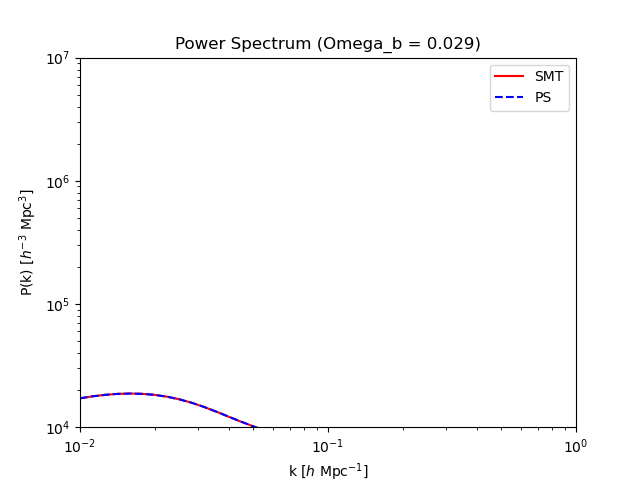

In [83]:
# Define the cosmological parameters
cosmo_params = {
    "H0": 67.4,     # Hubble constant at z=0
    "Om0": 0.13/0.674**2    # Matter density parameter at z=0
}

# Define the halo mass function model
hmf_model = 'SMT'

# Define the list of Omega_b values to plot
Ob0_list = [Ob0 / 0.674**2 for Ob0 in [0.013, 0.025, 0.038, 0.051, 0.064, 0.076, 0.089]]

# Create a series of plots for different values of Ob0
filenames = []
for i, Ob0 in enumerate(Ob0_list):
    cosmo_params["Ob0"] = Ob0
    plt.figure()
    plot_power_spectrum(z=0, cosmo_params=cosmo_params, color='red', linestyle='-')
    plot_power_spectrum(z=0, cosmo_params=cosmo_params, color='blue', linestyle='--')
    plt.title(f"Power Spectrum (Omega_b = {Ob0:.3f})")
    plt.xlim(1e-2, 1)
    plt.ylim(10e3, 10e6)
    plt.legend(['SMT', 'PS'])
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('power_spectrum_omega_b.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Explicitly close the writer
writer.close()

# Remove the individual PNG files
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename="power_spectrum_omega_b.gif")


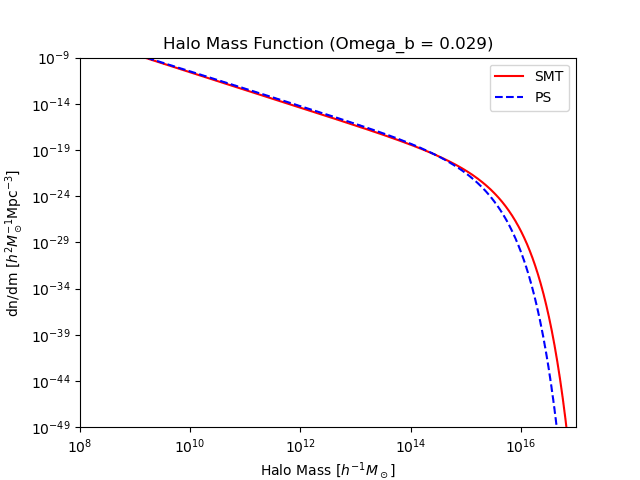

In [85]:
# Define the cosmological parameters
cosmo_params = {
    "H0": 67.4,     # Hubble constant at z=0
    "Om0": 0.13/0.674**2    # Matter density parameter at z=0
}

# Define the halo mass function model
hmf_model = 'SMT'

# Define the list of Omega_b values to plot
Ob0_list = [Ob0 / 0.674**2 for Ob0 in [0.013, 0.025, 0.038, 0.051, 0.064, 0.076, 0.089]]

# Create a series of plots for different values of Ob0
filenames = []
for i, Ob0 in enumerate(Ob0_list):
    cosmo_params["Ob0"] = Ob0
    plt.figure()
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='SMT', color='red', linestyle='-')
    plot_halo_mass_function(z=0, cosmo_params=cosmo_params, hmf_model='PS', color='blue', linestyle='--')
    plt.title(f"Halo Mass Function (Omega_b = {Ob0:.3f})")
    plt.xlim(1e8, 1e17)
    plt.ylim(10e-50, 10e-10)
    plt.legend(['SMT', 'PS'])
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('halo_mass_function_omega_b_1.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Explicitly close the writer
writer.close()

# Remove the individual PNG files
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename="halo_mass_function_omega_b_1.gif")


In [86]:
from classy import Class